In [2]:
print('Hello')

Hello


In [3]:
# pip install pandas numpy seaborn xgboost matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures

In [6]:
!python -V

Python 3.11.1


In [7]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
# from xgboost import XGBClassifier

In [9]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
Categorical = df.select_dtypes(include = 'O')
Categorical

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [11]:
numericals = df.select_dtypes(include = 'number')
numericals

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [12]:
df['Income Category'] = df['Income_Category'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['Income Category'] = df['Income Category'].astype(float) # .................. Turn the new column to a numerical datatype
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0


In [13]:
df.drop('Income_Category', axis = 1, inplace = True)

In [14]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,768805383,Existing Customer,45,M,3,High School,Married,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0


In [15]:
df.drop('CLIENTNUM', axis = 1, inplace = True)

In [16]:
df.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,Existing Customer,45,M,3,High School,Married,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,Existing Customer,49,F,5,Graduate,Single,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,Existing Customer,51,M,3,Graduate,Married,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
3,Existing Customer,40,F,4,High School,Unknown,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0
4,Existing Customer,40,M,3,Uneducated,Married,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0


Text(0.5, 1.0, 'Distribution Of Gender')

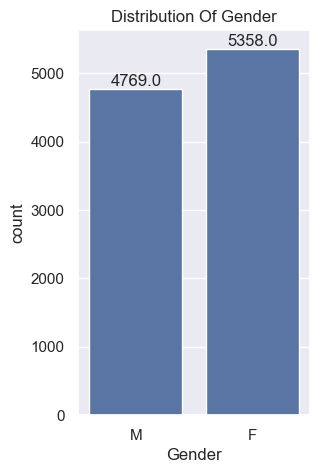

In [17]:
plt.figure(figsize = (3,5))
sns.set(style = 'darkgrid')

fig = sns.countplot(data=df, x='Gender')
fig.bar_label(fig.containers[0], fmt = '%.1f')
plt.title('Distribution Of Gender')

Text(0.5, 1.0, 'Distribution Of Attrition')

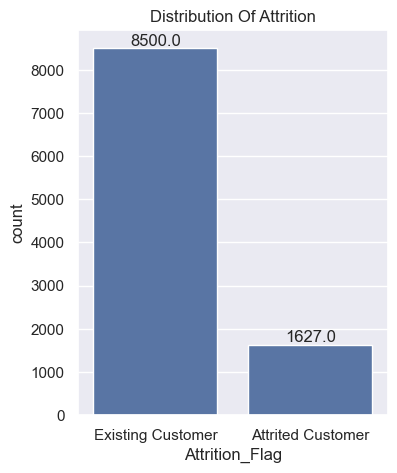

In [18]:
plt.figure(figsize = (4,5))
sns.set(style = 'darkgrid')

fig = sns.countplot(data=df, x='Attrition_Flag')
fig.bar_label(fig.containers[0], fmt = '%.1f')
plt.title('Distribution Of Attrition')

<Axes: xlabel='Credit_Limit', ylabel='Customer_Age'>

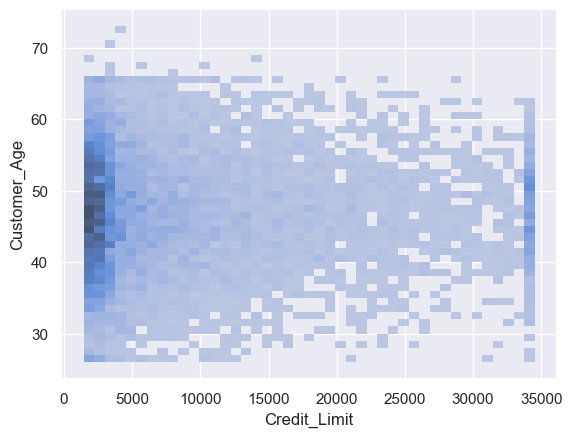

In [19]:
sns.histplot(data=df, x='Credit_Limit', y='Customer_Age')

Text(0.5, 1.0, 'Distribution of credit limit')

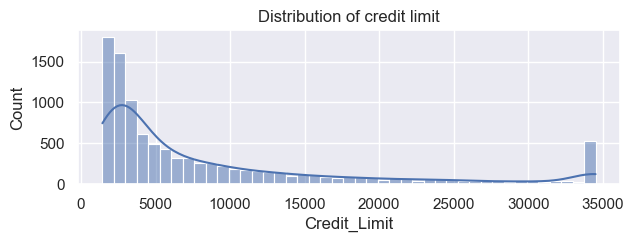

In [20]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (7,2))
sns.histplot(data=df,x='Credit_Limit', kde = True)
plt.title(f'Distribution of credit limit')

Text(0.5, 1.0, 'Distribution of Customer_Age')

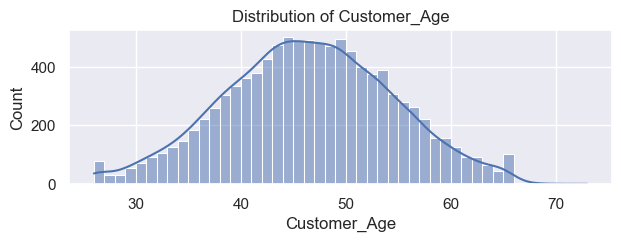

In [21]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (7,2))
sns.histplot(data=df,x='Customer_Age', kde = True)
plt.title(f'Distribution of Customer_Age')

In [22]:
# plt.figure(figsize = (7, 3))
# sns.set(style = 'darkgrid')
# sns.regplot(x = df['R&D Spend'], y = df['Profit'], ci = 0)

Text(0.5, 1.0, 'Distribution of Income')

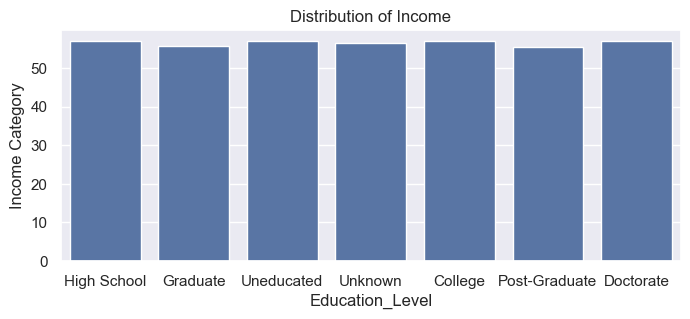

In [23]:
# Show the distribution of income according to education level

sns.set(style = 'darkgrid')
plt.figure(figsize = (8,3))
sns.barplot(data=df, x='Education_Level', y= 'Income Category', ci= 0, estimator = 'mean')
plt.title(f'Distribution of Income')



# plt.figure(figsize = (10, 4))
# fig = sns.barplot(x = data.Education_Level, y = data['Income Category'], ci = 0, palette = 'husl')
# fig.bar_label(fig.containers[0], fmt = '%.1f')

Text(0.5, 1.0, 'Distribution of Income')

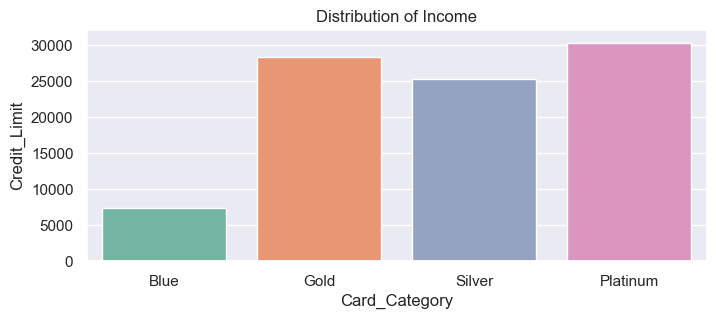

In [24]:
# Using Credit Limit as a metric, show the heirarchy of customers' importance based on card cateogry

sns.set(style = 'darkgrid')
plt.figure(figsize = (8,3))
sns.barplot(data=df, y='Credit_Limit', x = 'Card_Category', ci = 0 , palette= 'Set2')
plt.title(f'Distribution of Income')

<Axes: xlabel='Card_Category', ylabel='count'>

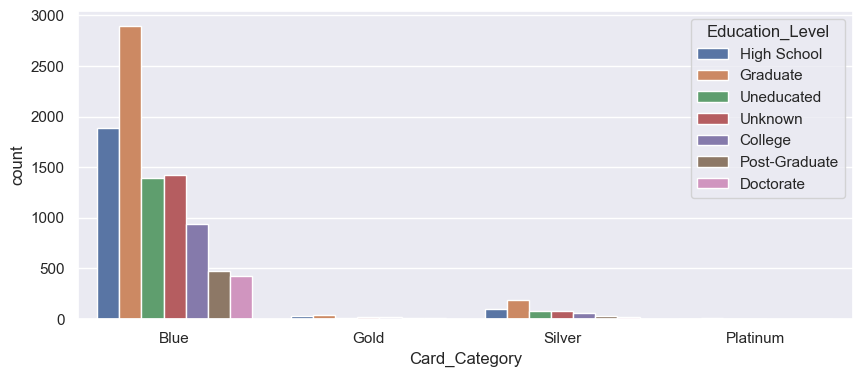

In [25]:
# Show the distribution of Education Level according to card category

sns.set(style = 'darkgrid')
plt.figure(figsize = (10,4))
sns.countplot(data=df, x='Card_Category', hue='Education_Level', )

In [26]:
# Visualise the average age of each varying class category while showing their gender distribution

# sns.set(style = 'darkgrid')
# plt.figure(figsize = (7,2))
# sns.histplot(data=df,x='Card_Category',y= 'Customer_Age', hue= 'Gender', estimator= 'mean')
# plt.title(f'Distribution of Customer_Age')

In [27]:
# # - Using XGBOOST to find feature importance
# import xgboost as xgb
# model = xgb.XGBClassifier()

# x = df.drop('Attrition_Flag', axis = 1)
# y = df.Attrition_Flag

# model.fit(x, y)

# plt.rcParams['figure.figsize'] = (10, 5)
# # Print feature importance scores
# xgb.plot_importance(model, importance_type= 'weight')
# plt.show()

In [28]:
# Remove 'Unknown' Marital Status
df = df.loc[df['Marital_Status'] != 'Unknown']

In [29]:
# Remove 'Unknown' Education_Level

df = df.loc[df['Education_Level'] != 'Unknown']

In [30]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in Categorical.columns:
    if i in df.columns:
        df[i] = encoder.fit_transform(df[i])

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,1,45,1,3,3,1,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,1,49,0,5,2,2,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,1,51,1,3,2,1,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
4,1,40,1,3,5,1,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0
5,1,44,1,2,2,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,40.0


In [31]:
df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7081.000000
mean,0.842343,46.366989,0.470463,2.328860,2.581713,1.334880,0.176094,35.997115,3.821146,2.345917,2.457293,8589.198921,1165.086291,7424.112630,0.760867,4377.087295,64.697730,0.712136,0.276402,56.367745
std,0.364442,8.109234,0.499158,1.294442,1.487277,0.621559,0.686473,8.054015,1.543196,1.003254,1.104245,9055.194233,812.955790,9059.881919,0.222345,3407.092700,23.585098,0.240165,0.275727,24.146968
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,40.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2550.000000,451.000000,1325.000000,0.631000,2132.000000,45.000000,0.583000,0.025000,40.000000
50%,1.000000,46.000000,0.000000,2.000000,2.000000,1.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4522.000000,1281.000000,3454.000000,0.736000,3870.000000,67.000000,0.700000,0.178000,40.000000
75%,1.000000,52.000000,1.000000,3.000000,3.000000,2.000000,0.000000,41.000000,5.000000,3.000000,3.000000,10973.000000,1783.000000,9799.000000,0.859000,4739.000000,81.000000,0.818000,0.504000,80.000000
max,1.000000,73.000000,1.000000,5.000000,5.000000,2.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,138.000000,3.714000,0.999000,120.000000


In [32]:
df.shape

(7973, 20)

In [33]:
birth = pd.Series([2024 - i for i in df['Customer_Age']])
df['Birth Year'] = birth

# OR

# birth_year = []

# for i in data['Customer_Age']:
#     birth_year.append(2024 - i)

# # convert new_list(birth_year) to series
# birth_year = pd.Series(birth_year)
# data['Birth Year'] = birth_year

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category,Birth Year
0,1,45,1,3,3,1,0,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0,1979.0
1,1,49,0,5,2,2,0,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0,1975.0
2,1,51,1,3,2,1,0,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0,1973.0
4,1,40,1,3,5,1,0,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0,1980.0
5,1,44,1,2,2,1,0,36,3,1,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,40.0,1987.0


In [34]:
df.shape


(7973, 21)

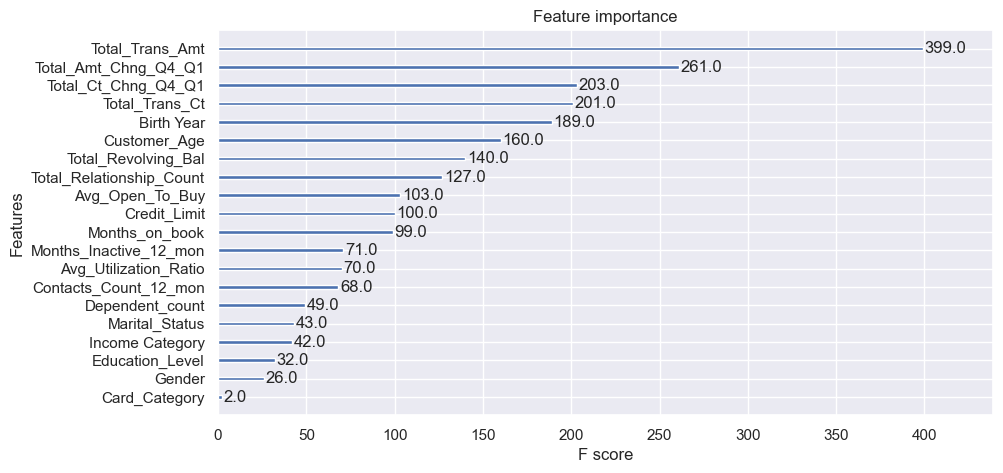

In [35]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = df.drop('Attrition_Flag', axis = 1)
y = df.Attrition_Flag

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [36]:
sel_columns = ['Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct',
 'Total_Revolving_Bal', 'Customer_Age', 'Credit_Limit', 'Attrition_Flag']

sel_data = df[sel_columns]
sel_data

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age,Credit_Limit,Attrition_Flag
0,1144,1.335,1.625,42,777,45,12691.0,1
1,1291,1.541,3.714,33,864,49,8256.0,1
2,1887,2.594,2.333,20,0,51,3418.0,1
4,816,2.175,2.500,28,0,40,4716.0,1
5,1088,1.376,0.846,24,1247,44,4010.0,1
...,...,...,...,...,...,...,...,...
10120,15577,0.660,0.754,114,2109,54,13940.0,1
10121,14596,0.570,0.791,120,606,56,3688.0,1
10122,15476,0.703,0.857,117,1851,50,4003.0,1
10124,10291,0.819,0.818,60,0,44,5409.0,0


Model Selection

<Axes: xlabel='Attrition_Flag', ylabel='count'>

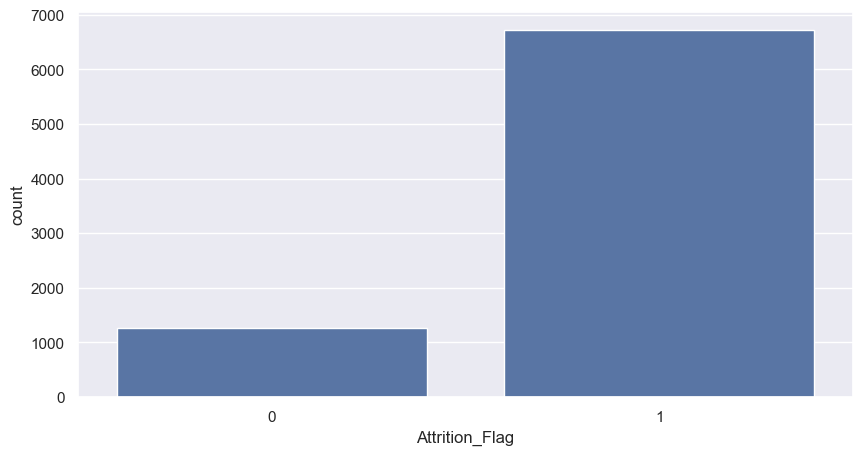

In [37]:
sns.countplot(x = df.Attrition_Flag)

In [38]:


# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =x = sel_data.drop('Attrition_Flag', axis = 1)
y = sel_data.Attrition_Flag train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

Random Undersampling

In [39]:
full_data = pd.concat([xtrain, ytrain], axis = 1)

class_0 = full_data.loc[full_data['Attrition_Flag'] == 0]
class_1 = full_data.loc[full_data['Attrition_Flag'] == 1]

print(f'Class of Zero shape: {class_0.shape}\nClass of One shape: {class_1.shape}')

Class of Zero shape: (1006, 8)
Class of One shape: (5372, 8)


In [40]:
new_class1 = class_1.sample(1000)
new_class1.shape

(1000, 8)

(2006, 8)


<Axes: xlabel='Attrition_Flag', ylabel='count'>

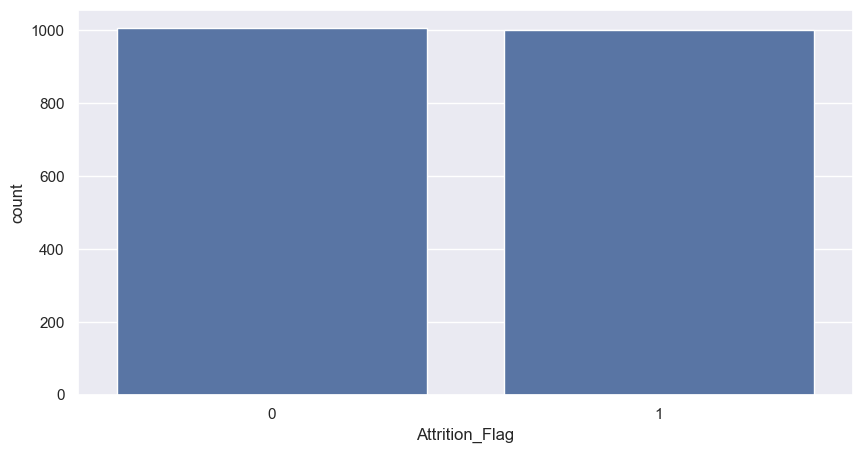

In [41]:
new_balanced_data = pd.concat([class_0, new_class1], axis = 0) # -------- Join the data together
print(new_balanced_data.shape)

sns.set(style = 'darkgrid')
sns.countplot(x = new_balanced_data['Attrition_Flag'])

In [42]:
new_balanced_data

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Revolving_Bal,Customer_Age,Credit_Limit,Attrition_Flag
9926,9451,0.915,0.646,79,2517,29,6500.0,0
7118,2684,0.721,0.560,39,2517,45,3489.0,0
7948,2156,0.496,0.194,37,0,41,1655.0,0
6810,2616,0.791,0.469,47,0,50,3546.0,0
6534,2245,0.491,0.464,41,2404,41,2811.0,0
...,...,...,...,...,...,...,...,...
1542,1859,0.788,0.571,33,1880,35,19127.0,1
2755,2625,1.146,0.625,52,2229,34,3203.0,1
59,1168,0.690,1.250,27,1753,42,3336.0,1
8667,7509,0.718,0.647,84,2077,52,18336.0,1


<hr>
<h3><b>Random oversampling using Synthetic Minority Oversampling Technique (SMOTE)

In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'auto', random_state=29)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

<Axes: xlabel='Attrition_Flag', ylabel='count'>

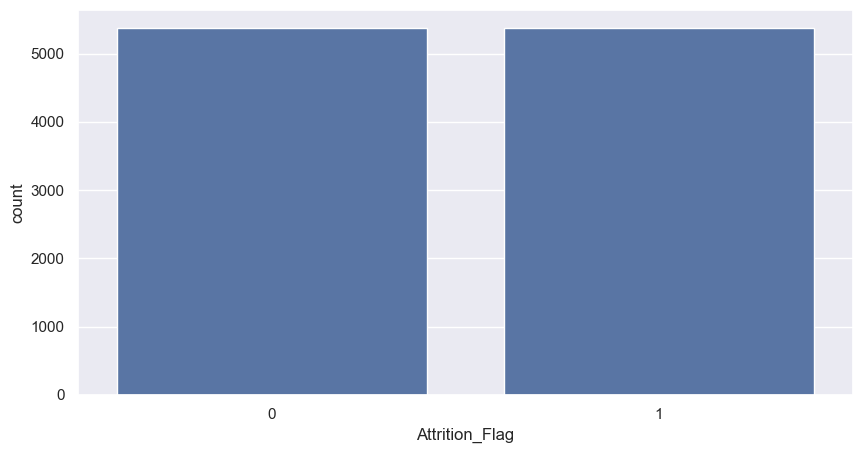

In [59]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['Attrition_Flag'])


In [50]:
# Algorithms To Be Used
RandomForest Classifier
DecisionTree Classifier
XGBoost Classifier
Support Vector Classifier

SyntaxError: invalid syntax (2412086324.py, line 2)

In [60]:
# getting the best random to use for the smote
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

scores = [] # -------------------------------------------------------------- Create a list to store the scores of each loop
for i in range(100):
    smote = SMOTE(sampling_strategy= 'auto', random_state= i)
    X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

    # Creating a model
    model= LogisticRegression()
    model.fit(X_resampled, y_resampled)

    scores.append(accuracy_score(model.predict(X_resampled), y_resampled))

In [61]:
import numpy as np
print(f'Best Random State To Use: {np.array(scores).argmax()}')

Best Random State To Use: 29


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression() # ----------------------------------------------- Instantiate the algorithm

log_reg.fit(X_resampled, y_resampled) # -------------------------------------------------- Fit the algorithm on the data to create a model
cross_val = log_reg.predict(X_resampled) # ----------------------------------------- Cros validate the model
print(classification_report(cross_val, y_resampled))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      5381
           1       0.83      0.83      0.83      5363

    accuracy                           0.83     10744
   macro avg       0.83      0.83      0.83     10744
weighted avg       0.83      0.83      0.83     10744



In [69]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(accuracy_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(accuracy_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]


table, model1, model2 = modeller(X_resampled, y_resampled, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
1,"XGBClassifier(base_score=None, booster=None, c...",0.958621,0.999628
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.957367,1.000000
2,DecisionTreeClassifier(),0.938558,1.000000
4,LogisticRegression(),0.822571,0.827345
3,SVC(kernel='poly'),0.427586,0.631422


In [70]:
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5376
           1       1.00      1.00      1.00      5368

    accuracy                           1.00     10744
   macro avg       1.00      1.00      1.00     10744
weighted avg       1.00      1.00      1.00     10744



<Axes: >

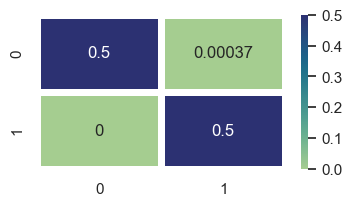

In [71]:
# --------- XGBOOST CLASSIFIER MODELLING --------------
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_resampled, y_resampled)

cross_validation = xgb_model.predict(X_resampled)
print(classification_report(cross_validation, y_resampled))

revealer = confusion_matrix(cross_validation, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5372
           1       1.00      1.00      1.00      5372

    accuracy                           1.00     10744
   macro avg       1.00      1.00      1.00     10744
weighted avg       1.00      1.00      1.00     10744



<Axes: >

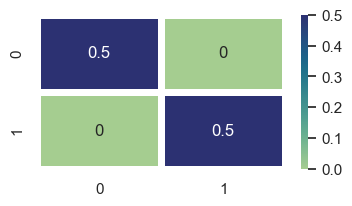

In [72]:
# --------- RANDOM FOREST CLASSIFIER MODELLING --------------

from sklearn.ensemble import RandomForestClassifier
rand_model = RandomForestClassifier()

rand_model.fit(X_resampled, y_resampled)

cross_validation = rand_model.predict(X_resampled)
print(classification_report(cross_validation, y_resampled))

revealer = confusion_matrix(cross_validation, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       285
           1       0.96      0.98      0.97      1310

    accuracy                           0.95      1595
   macro avg       0.94      0.90      0.92      1595
weighted avg       0.95      0.95      0.95      1595



<Axes: >

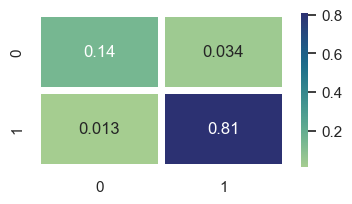

In [75]:
# Check For Overfitting

test_prediction = rand_model.predict(xtest)
print(classification_report(test_prediction, ytest))

revealer = confusion_matrix(test_prediction, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [76]:
# Export the model
import pickle

pickle.dump(xgb_model, open('churners_model.pkl', "wb"))

In [78]:
import joblib
imported_model = joblib.load('churners_model.pkl')

imported_model.predict([[3730, 	0.836, 	0.941 ,	66 	,1153 ,	50 ,	2845.0 	]])

array([1])